# Two Feldspar thermometry
- First, we consider analyses of touching Kspar-Plag pairs
- Then we consider the situation common in lavas where you have a lot of individual Plag-Kspar crystals, and you want to assess all possible combinations from a single sample or deposit
- You can download the excel spreadsheet this reads from here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Feldspar_Thermobarometry/Two_Feldspar_input.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

### Import python things and set plotting parameters

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## Example 1 - Touching Pairs pressure calculations
- Make an excel spreadsheet where you have rows for each touching pair, with the column headings SiO2_Kspar for SiO2 in the Kspar, SiO2_Plag for SiO2 in the Plag etc. The column order doesnt matter. 
- FeO is always as FeOt

### Loading in excel spreadsheet

In [3]:
out=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Paired_Plag_Kspar")
# This extracts a dataframe of all inputs
my_input=out['my_input']
# This extracts a dataframe of kspar compositions from the dictionary "out"
Kspars=out['Kspars']
# This extracts a dataframe of plag compositions from the dictionary "out"
Plags=out['Plags']

### check that your inputs have been read in properly, to do this, do "name".head() to look at the first few rows

In [4]:
display(Plags.head())
display(Kspars.head())

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,56.3,0.0,31.4,0.31,0.0,0.05,14.60,2.70,0.71,0.0,0
1,60.5,0.0,24.8,0.07,0.0,0.00,5.92,7.36,1.42,0.0,1
2,57.8,0.0,26.7,0.08,0.0,0.00,8.06,6.08,1.13,0.0,2
3,46.2,0.0,33.5,0.31,0.0,0.00,17.40,1.22,0.30,0.0,3
4,50.3,0.0,31.1,0.54,0.0,0.06,14.50,2.76,0.79,0.0,4


,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar
0,65.0,0.0,19.1,0.11,0.0,0.03,0.51,2.02,13.40,0.0,0
1,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0,1
2,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0,2
3,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0.0,3
4,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0.0,4


- If at any point you want to find out more about a function, and what equations it offers, you can use the help function

In [5]:
help(pt.calculate_plag_kspar_temp)

Help on function calculate_plag_kspar_temp in module Thermobar.feldspar:

calculate_plag_kspar_temp(*, plag_comps=None, kspar_comps=None, Two_Fspar_Match=None, equationT=None, P=None, eq_tests=False)
    Two feldspar thermometer (Kspar-Plag), returns temperature in Kelvin

    Parameters
    ----------

    plag_comps: pandas.DataFrame
        Plag compositions with column headings SiO2_Plag, MgO_Plag etc.

    kspar_comps: pandas.DataFrame
        Kspar compositions with column headings SiO2_Kspar, MgO_Kspar etc.

    EquationT: str
        choose from:

            |   T_Put2008_eq27a (P-dependent, H2O-independent)
            |   T_Put2008_eq27b (P-dependent, H2O-independent)
            |   T_Put_Global_2Fspar (P-dependent, H2O-independent)

    P: float, int, pandas.Series, str
        Pressure in kbar to perform calculations at.
        Only needed for P-sensitive thermometers.
        If P="Solve", returns a partial function,
        else, enter an integer, float, or panda serie

- You can also do help on the equations themselves to get a bit more information, 


In [6]:
help(pt.T_Put2008_eq27a)

Help on function T_Put2008_eq27a in module Thermobar.feldspar:

T_Put2008_eq27a(P, *, K_Barth, Si_Kspar_cat_frac, Ca_Kspar_cat_frac, An_Kspar, An_Plag, Ab_Plag)
    Two feldspar thermometer: Equation 27a of Putirka (2008).
    :cite:`putirka2008thermometers`

    SEE±23°C for calibration

    SEE±44°C for test data



### 1a - Calculating T, fixed P
- The function calculate_plag_kspar_temp calculates T in Kelvin using inputted Kspar, Plag compositions, a user-selected equation, and a pressure estimate (5 kbar here). 

In [ ]:
T_27a_5kbar=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, 
                                         equationT="T_Put2008_eq27a", P=5)
T_27a_5kbar

0     1262.750535
1     1228.315833
2     1228.544941
3     1217.144277
4     1223.769830
5     1105.033113
6     1125.829491
7     1101.897076
8     1028.088282
9     1027.699692
10    1001.179781
11    1008.433052
12    1030.489241
13    1056.190474
14     989.896820
15     942.020563
dtype: float64

In [20]:
T_27a_5kbar=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, 
                                         equationT="T_Put_Global_2Fspar", P=5)
T_27a_5kbar

0     1244.548127
1     1169.700438
2     1173.458193
3     1157.295326
4     1220.920220
5     1078.732696
6     1099.925266
7     1080.433320
8      994.151925
9      990.815588
10     999.731837
11     981.584176
12     993.672310
13    1016.814937
14     968.166032
15     925.278831
dtype: float64

### 1b - Can also specify a panda series of pressures for the original spreadsheet
- here, presure stored in a column in GPa, so need to multiply by 10  to get kbar for the function

In [8]:
T_27a_5kbar=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, 
                                         equationT="T_Put2008_eq27a", 
                                         P=10*my_input['P_GPa'])-273.15
T_27a_5kbar

0      989.600535
1      955.165833
2     1053.643565
3      943.994277
4      950.619830
5      831.883113
6      930.082357
7      988.688652
8      969.169184
9      754.549692
10     728.029781
11     735.283052
12     757.339241
13     783.040474
14     716.746820
15     668.870563
dtype: float64

### 1c - Can also specify Eq_Test=True, this calculates activities based on Elkins and Grove (1990), following the protocol in the supplementary spreadsheets of Putirka. 
- Note, Putirka (2008) don't give any values of equilibrium tests unlike Cpx-Opx, or Cpx-Liq etc. Instead, they say 
"As a test for equilibrium, one can compare the activities between those calculated for alkali and plagioclase feldspar, 
using the models of Elkins and Grove (1990) (columns AX – AZ). These should nominally be zero, but tests are required to 
determine whether this measure of equilibrium is effective at reducing error for T calculated using experimental data."
- Thus, we don't apply any filters by default, but show users how to filter based on these values below

In [9]:
T_27a_5kbar_EqTests=pt.calculate_plag_kspar_temp(plag_comps=Plags, kspar_comps=Kspars, 
                    equationT="T_Put2008_eq27a", P=10*my_input['P_GPa'], eq_tests=True)
T_27a_5kbar_EqTests.head()

,T_K_calc,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,K_Barth,T,P
0,1262.750535,0.045987,0.187872,0.208913,0.582154,0.919522,1.024046,0.394282,0.873535,0.815133,56.3,0.0,31.4,0.31,0.0,0.05,14.60,2.70,0.71,0.0,0,0.937017,0.001241,0.004315,0.260354,0.615922,0.087126,0.015075,0.0,0.0,0.0,1.921050,0.487763,0.000646,0.002246,0.135527,0.320617,0.045354,0.007847,0.0,0.0,0.0,0.718109,0.240312,0.041580,65.0,0.0,19.1,0.11,0.0,0.03,0.51,2.02,13.40,0.0,0,1.081813,0.000744,0.001531,0.009095,0.374653,0.065183,0.284513,0.0,0.0,0.0,1.817533,0.595210,0.000410,0.000842,0.005004,0.206133,0.035864,0.156538,0.0,0.0,0.0,0.025348,0.181675,0.792977,0.755998,1262.750535,10
1,1228.315833,0.248834,-0.042074,-0.075490,0.653809,0.839507,0.602659,0.695883,0.590672,0.678149,60.5,0.0,24.8,0.07,0.0,0.00,5.92,7.36,1.42,0.0,1,1.006919,0.000000,0.000974,0.105568,0.486461,0.237500,0.030150,0.0,0.0,0.0,1.867572,0.539159,0.000000,0.000522,0.056527,0.260478,0.127171,0.016144,0.0,0.0,0.0,0.282859,0.636357,0.080784,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0.0,1,1.090135,0.000000,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.000000,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.036410,0.422555,0.541035,0.664022,1228.315833,10
2,1326.793565,0.412296,-0.015576,-0.233532,0.610283,0.861556,0.516050,0.625859,0.449261,0.749582,57.8,0.0,26.7,0.08,0.0,0.00,8.06,6.08,1.13,0.0,2,0.961982,0.000000,0.001113,0.143730,0.523730,0.196196,0.023993,0.0,0.0,0.0,1.850743,0.519781,0.000000,0.000602,0.077661,0.282983,0.106009,0.012964,0.0,0.0,0.0,0.394951,0.539121,0.065928,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0.0,2,1.088471,0.000000,0.000696,0.010521,0.380538,0.101002,0.244172,0.0,0.0,0.0,1.825399,0.596292,0.000000,0.000381,0.005764,0.208468,0.055332,0.133763,0.0,0.0,0.0,0.029579,0.283957,0.686464,0.526704,1326.793565,20
3,1217.144277,-0.125097,0.344129,0.379772,0.600615,0.925594,1.265507,0.256487,1.050691,0.885735,46.2,0.0,33.5,0.31,0.0,0.00,17.40,1.22,0.30,0.0,3,0.768920,0.000000,0.004315,0.310285,0.657114,0.039368,0.006370,0.0,0.0,0.0,1.786372,0.430437,0.000000,0.002415,0.173696,0.367848,0.022038,0.003566,0.0,0.0,0.0,0.871531,0.110578,0.017891,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0.0,3,1.075156,0.000000,0.001253,0.006955,0.368768,0.037109,0.314238,0.0,0.0,0.0,1.803480,0.596156,0.000000,0.000695,0.003856,0.204476,0.020577,0.174240,0.0,0.0,0.0,0.019410,0.103570,0.877020,0.936627,1217.144277,10
4,1223.769830,-0.442938,0.223217,0.445615,0.589090,0.932291,1.275140,0.365873,1.375229,0.829525,50.3,0.0,31.1,0.54,0.0,0.06,14.50,2.76,0.79,0.0,4,0.837157,0.001489,0.007516,0.258571,0.610037,0.089063,0.016774,0.0,0.0,0.0,1.820606,0.459823,0.000818,0.004128,0.142025,0.335074,0.048919,0.009213,0.0,0.0,0.0,0.709566,0.244404,0.046030,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0.0,4,1.028555,0.000744,0.007098,0.011769,0.376615,0.055180,0.273897,0.0,0.0,0.0,1.753859,0.586453,0.000424,0.004047,0.006711,0.214735,0.031462,0.156168,

## Example 2 - Combining all possible Plag-Kspar Pairs
- Say you don't have touching Plag-Kspar pairs, but instead a list of Kspar compositions you have measured on the probe in one sheet of an excel spreadsheet, and a set of Plag compositions in another sheet
- The functions ending in "_matching" in Thermobar consider all possible combinations of Plags and Kspars


### Import Kspars

In [10]:
out2=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Kspar")
Kspars2=out2['Kspars']
Kspars2.head()

,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar
0,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0,1
1,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0,2
2,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0,3
3,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0,4
4,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0,5


### Import plags

In [11]:
out3=pt.import_excel('Two_Feldspar_input.xlsx', sheet_name="Plag")
Plags3=out3['Plags']
Plags3.head()

,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag
0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0
1,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1
2,57.6,0.11,26.3,0.50,0,0.07,8.50,6.27,0.40,0,2
3,57.2,0.16,27.0,0.62,0,0.06,9.03,5.58,0.84,0,3
4,56.7,0.14,27.6,0.69,0,0.11,9.46,5.58,0.48,0,4


### Calculate T for all matches using equation 27a at 5 kbar

In [12]:
T_27a_5kbar_All=pt.calculate_plag_kspar_temp_matching(plag_comps=Plags3, kspar_comps=Kspars2, 
                                                      equationT="T_Put2008_eq27a", P=5)
T_27a_5kbar_All

Considering N=7 Plag & N=11 Kspar, which is a total of N=77 Plag-Kspar pairs, be patient if this is >>1 million!


,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
0,0.295531,0.002892,-0.326051,0.638916,0.902959,0.322702,0.636023,0.607427,0.648754,1269.748822,65.5,0.0,19.6,0.07,0.0,0.00,0.75,4.81,9.36,0,1,1.090135,0.000000,0.000974,0.013374,0.384461,0.155214,0.198735,0.0,0.0,0.0,1.842893,0.591535,0.000000,0.000529,0.007257,0.208618,0.084223,0.107838,0.0,0.0,0.0,0.036410,0.422555,0.541035,0.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.763208,1269.748822,5
1,-0.092624,0.110226,-0.329378,0.641223,0.956165,0.410594,0.530997,1.048788,0.739972,1197.800282,65.4,0.0,19.4,0.05,0.0,0.00,0.59,3.13,11.50,0,2,1.088471,0.000000,0.000696,0.010521,0.380538,0.101002,0.244172,0.0,0.0,0.0,1.825399,0.596292,0.000000,0.000381,0.005764,0.208468,0.055332,0.133763,0.0,0.0,0.0,0.029579,0.283957,0.686464,1.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.512876,1197.800282,5
2,-2.324993,0.335739,0.000517,0.648692,1.149221,0.890109,0.312954,3.474214,0.889592,1013.354929,64.6,0.0,18.8,0.09,0.0,0.00,0.39,1.15,14.80,0,3,1.075156,0.000000,0.001253,0.006955,0.368768,0.037109,0.314238,0.0,0.0,0.0,1.803480,0.596156,0.000000,0.000695,0.003856,0.204476,0.020577,0.174240,0.0,0.0,0.0,0.019410,0.103570,0.877020,2.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.187066,1013.354929,5
3,-1.933109,0.255822,-0.187706,0.645605,1.065363,0.647145,0.389783,2.998471,0.834851,1081.998018,61.8,0.0,19.2,0.51,0.0,0.03,0.66,1.71,12.90,0,4,1.028555,0.000744,0.007098,0.011769,0.376615,0.055180,0.273897,0.0,0.0,0.0,1.753859,0.586453,0.000424,0.004047,0.006711,0.214735,0.031462,0.156168,0.0,0.0,0.0,0.034530,0.161891,0.803579,3.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.292404,1081.998018,5
4,0.064453,0.110505,-0.269422,0.643095,1.001463,0.498868,0.532590,0.937010,0.768290,1145.332986,65.1,0.0,19.2,0.05,0.0,0.00,0.36,2.87,12.60,0,5,1.083478,0.000000,0.000696,0.006420,0.376615,0.092612,0.267527,0.0,0.0,0.0,1.827347,0.592924,0.000000,0.000381,0.003513,0.206099,0.050681,0.146402,0.0,0.0,0.0,0.017513,0.252653,0.729834,4.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,

### Examine equilibrium tests
- As it is currently unclear what delta values are acceptable, we leave it up to the users to investigate the experimental data, but provide an example here of how you can filter based on these values
- First, plot up the delta values to get an idea of the degree of disequilibrium

Text(0, 0.5, '# of measurements')

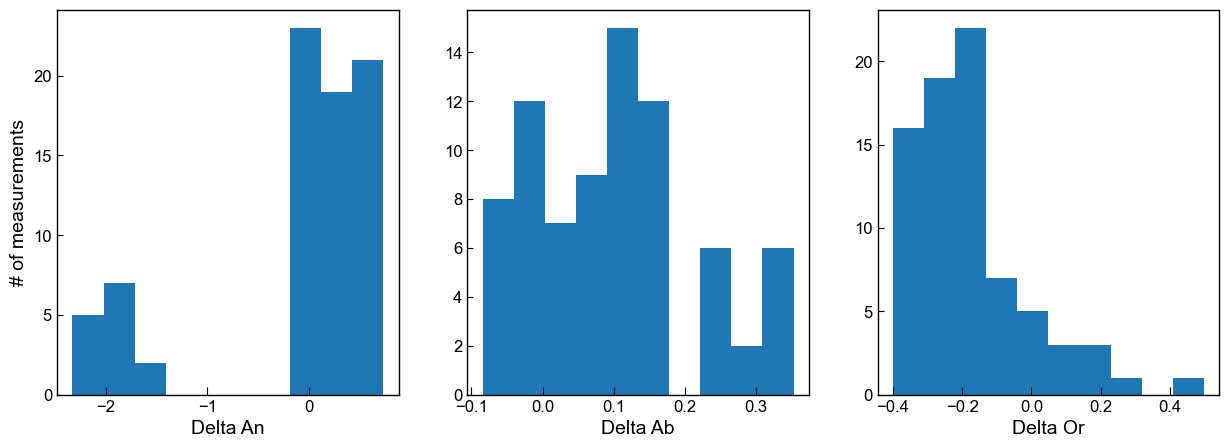

In [13]:
fig, ((ax0, ax1, ax2)) = plt.subplots(1,3, figsize = (15,5)) # adjust dimensions of figure here
ax0.hist(T_27a_5kbar_All['Delta_An'])
ax1.hist(T_27a_5kbar_All['Delta_Ab'])
ax2.hist(T_27a_5kbar_All['Delta_Or'])
ax0.set_xlabel('Delta An')
ax1.set_xlabel('Delta Ab')
ax2.set_xlabel('Delta Or')
ax0.set_ylabel('# of measurements')

### Filtering outputs
- Here we make filters, the "filt_a_..." considers all avlues of Delta An <1, and is a bool, so a series of true and false statements

In [14]:
# This says accept pairs within Delta An between +-1
filt_a_An=abs(T_27a_5kbar_All['Delta_An'])<1 

# This says accept pairs with Delta Ab between +-0.15
filt_a_Ab=abs(T_27a_5kbar_All['Delta_Ab'])<0.15 

# This says accept pairs with Delta Or between +-0.2
filt_a_Or=abs(T_27a_5kbar_All['Delta_Or'])<0.2 

### Apply filters
- Here, we apply these filters to only consider pairs meeting all 3 criteria above

In [15]:
# This filters pairs to only those meeting these three criteria defined above
Filt_pairs=T_27a_5kbar_All.loc[filt_a_An&filt_a_Ab&filt_a_Or] 
Filt_pairs

,Delta_An,Delta_Ab,Delta_Or,a_Ab_plg,a_An_plg,a_Or_plg,a_Ab_kspar,a_An_kspar,a_Or_kspar,T_K_calc,SiO2_Kspar,TiO2_Kspar,Al2O3_Kspar,FeOt_Kspar,MnO_Kspar,MgO_Kspar,CaO_Kspar,Na2O_Kspar,K2O_Kspar,Cr2O3_Kspar,Sample_ID_Kspar,Si_Kspar_cat_prop,Mg_Kspar_cat_prop,Fet_Kspar_cat_prop,Ca_Kspar_cat_prop,Al_Kspar_cat_prop,Na_Kspar_cat_prop,K_Kspar_cat_prop,Mn_Kspar_cat_prop,Ti_Kspar_cat_prop,Cr_Kspar_cat_prop,sum,Si_Kspar_cat_frac,Mg_Kspar_cat_frac,Fet_Kspar_cat_frac,Ca_Kspar_cat_frac,Al_Kspar_cat_frac,Na_Kspar_cat_frac,K_Kspar_cat_frac,Mn_Kspar_cat_frac,Ti_Kspar_cat_frac,Cr_Kspar_cat_frac,An_Kspar,Ab_Kspar,Or_Kspar,ID_Kspar,SiO2_Plag,TiO2_Plag,Al2O3_Plag,FeOt_Plag,MnO_Plag,MgO_Plag,CaO_Plag,Na2O_Plag,K2O_Plag,Cr2O3_Plag,Sample_ID_Plag,Si_Plag_cat_prop,Mg_Plag_cat_prop,Fet_Plag_cat_prop,Ca_Plag_cat_prop,Al_Plag_cat_prop,Na_Plag_cat_prop,K_Plag_cat_prop,Mn_Plag_cat_prop,Ti_Plag_cat_prop,Cr_Plag_cat_prop,sum,Si_Plag_cat_frac,Mg_Plag_cat_frac,Fet_Plag_cat_frac,Ca_Plag_cat_frac,Al_Plag_cat_frac,Na_Plag_cat_frac,K_Plag_cat_frac,Mn_Plag_cat_frac,Ti_Plag_cat_frac,Cr_Plag_cat_frac,An_Plag,Ab_Plag,Or_Plag,ID_Plag,K_Barth,T,P
7,0.483175,0.034127,-0.149859,0.645062,1.051235,0.611800,0.610935,0.568060,0.761658,1095.067777,64.9,0.0,18.6,0.00,0.0,0.00,0.17,3.02,12.10,0,8,1.080149,0.000000,0.000000,0.003032,0.364845,0.097453,0.256911,0.0,0.0,0.0,1.802390,0.599287,0.000000,0.000000,0.001682,0.202423,0.054069,0.142539,0.0,0.0,0.0,0.008482,0.272674,0.718843,7.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.492498,1095.067777,5
8,0.615621,-0.015126,-0.197861,0.643541,1.012541,0.522500,0.658666,0.396920,0.720361,1133.531892,66.0,0.0,18.9,0.05,0.0,0.00,0.18,3.73,11.30,0,9,1.098457,0.000000,0.000696,0.003210,0.370730,0.120364,0.239925,0.0,0.0,0.0,1.833381,0.599143,0.000000,0.000380,0.001751,0.202211,0.065651,0.130865,0.0,0.0,0.0,0.008830,0.331125,0.660044,8.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.59807,1133.531892,5
10,0.345956,0.076966,-0.124167,0.645848,1.071757,0.663643,0.568882,0.725801,0.787810,1076.240814,65.5,0.0,18.9,0.11,0.0,0.04,0.17,2.58,12.50,0,11,1.090135,0.000992,0.001531,0.003032,0.370730,0.083254,0.265404,0.0,0.0,0.0,1.815078,0.600599,0.000547,0.000844,0.001670,0.204250,0.045868,0.146222,0.0,0.0,0.0,0.008620,0.236726,0.754654,10.0,57.3,0.09,26.6,0.43,0,0.03,8.33,6.11,0.49,0,0,0.95366,0.000744,0.005985,0.148545,0.521768,0.197164,0.010404,0.0,0.001127,0.0,1.839397,0.518464,0.000405,0.003254,0.080757,0.283663,0.107189,0.005656,0.0,0.000613,0.0,0.417129,0.553656,0.029215,0,0.427569,1076.240814,5
18,0.512559,0.037062,-0.132206,0.637768,1.044104,0.627760,0.600706,0.531545,0.759966,1109.293338,64.9,0.0,18.6,0.00,0.0,0.00,0.17,3.02,12.10,0,8,1.080149,0.000000,0.000000,0.003032,0.364845,0.097453,0.256911,0.0,0.0,0.0,1.802390,0.599287,0.000000,0.000000,0.001682,0.202423,0.054069,0.142539,0.0,0.0,0.0,0.008482,0.272674,0.718843,7.0,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.513989,0.000678,0.003576,0.087237,0.288413,0.099832,0.005455,0.0,0.000821,0.0,0.453125,0.518543,0.028332,1,0.525847,1109.293338,5
19,0.635801,-0.013936,-0.186124,0.635049,1.008142,0.531789,0.648985,0.372340,0.717913,1149.132699,66.0,0.0,18.9,0.05,0.0,0.00,0.18,3.73,11.30,0,9,1.098457,0.000000,0.000696,0.003210,0.370730,0.120364,0.239925,0.0,0.0,0.0,1.833381,0.599143,0.000000,0.000380,0.001751,0.202211,0.065651,0.130865,0.0,0.0,0.0,0.008830,0.331125,0.660044,8.0,56.5,0.12,26.9,0.47,0,0.05,8.95,5.66,0.47,0,1,0.940345,0.001241,0.006542,0.159601,0.527653,0.182643,0.009979,0.0,0.001502,0.0,1.829506,0.